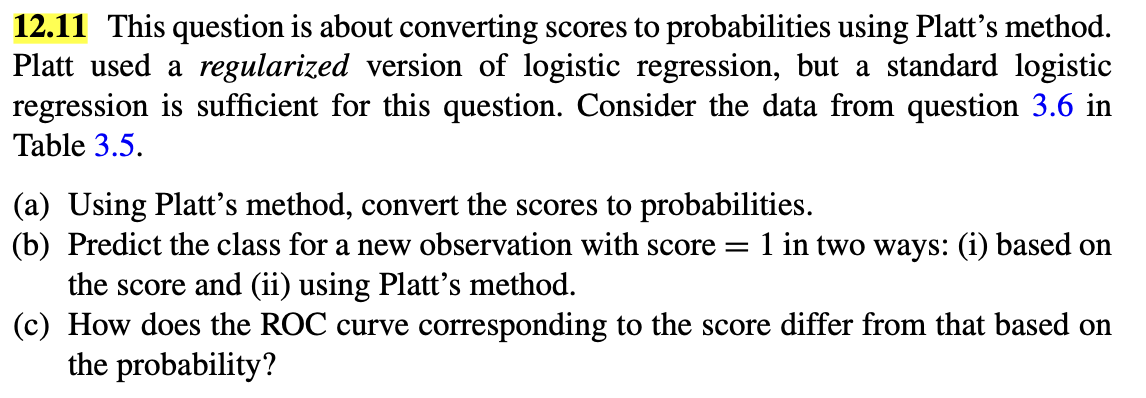

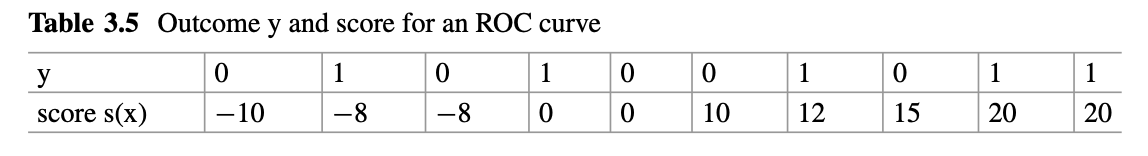

### Part a)
Converting the scores to probabilities.

Platt's method is essentially just using logistic regression to "squish" the scores into "probabilities." So, we just feed the responses and scores into the glm() function, and go from there. 

In [21]:
# setting dataframe with y and score
df <- data.frame(y = c(0, 1, 0, 1, 0, 0, 1, 0, 1, 1), 
                 score = c(-10, -8, -8, 0, 0, 10, 12, 15, 20, 20))

# platt's method - squishing the scores into probabilities
platt_model = glm(y ~ score, data = df, family = binomial())

# temp dataframe for the "predictions" (i.e. just converting the scores for the predict function)
conv = data.frame(score = df$score)
# evaluate the given scores, convert to probabilities
q = predict(platt_model, conv, type = "response")
# print the original scores and the probabilities
for (i in 1:length(q)) {
    print(paste("Original score:", df$score[i], "-- Probability:", q[i]))
}

[1] "Original score: -10 -- Probability: 0.27741875991883"
[1] "Original score: -8 -- Probability: 0.303526156792241"
[1] "Original score: -8 -- Probability: 0.303526156792241"
[1] "Original score: 0 -- Probability: 0.419797350356832"
[1] "Original score: 0 -- Probability: 0.419797350356832"
[1] "Original score: 10 -- Probability: 0.576907482289741"
[1] "Original score: 12 -- Probability: 0.607503499398293"
[1] "Original score: 15 -- Probability: 0.651795117946659"
[1] "Original score: 20 -- Probability: 0.719864063074205"
[1] "Original score: 20 -- Probability: 0.719864063074205"


### Part b)

Predicting $\text{score} = 1$ based on:

1. Score
2. Platt's Method

In [26]:
# predicting based on score
new_score = data.frame(score = 1)
# simply - if > 0, classify as 1, otherwise 0
pred_class = ifelse(new_score > 0, 1, 0)
# print it
print(paste("Predicted class (based on score) is:" , pred_class))

[1] "Predicted class (based on score) is: 1"


In [27]:
# predicting based on platt's method
pred_platt = predict(platt_model, new_score, type = "response")
# using arbitrary cutoff of 0.5 (as per the usual)
pred_platt_class = ifelse(pred_platt > 0.5, 1, 0)
# print it
print(paste("Predicted class (based on Platt's method) is:" , pred_platt_class))

[1] "Predicted class (based on Platt's method) is: 0"


As we can see, we get two different predicitions based on which classification method we use. The regular prediction based on score generates a class of $y = 1$, while Platt's method generates a class of $y = 0$.

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



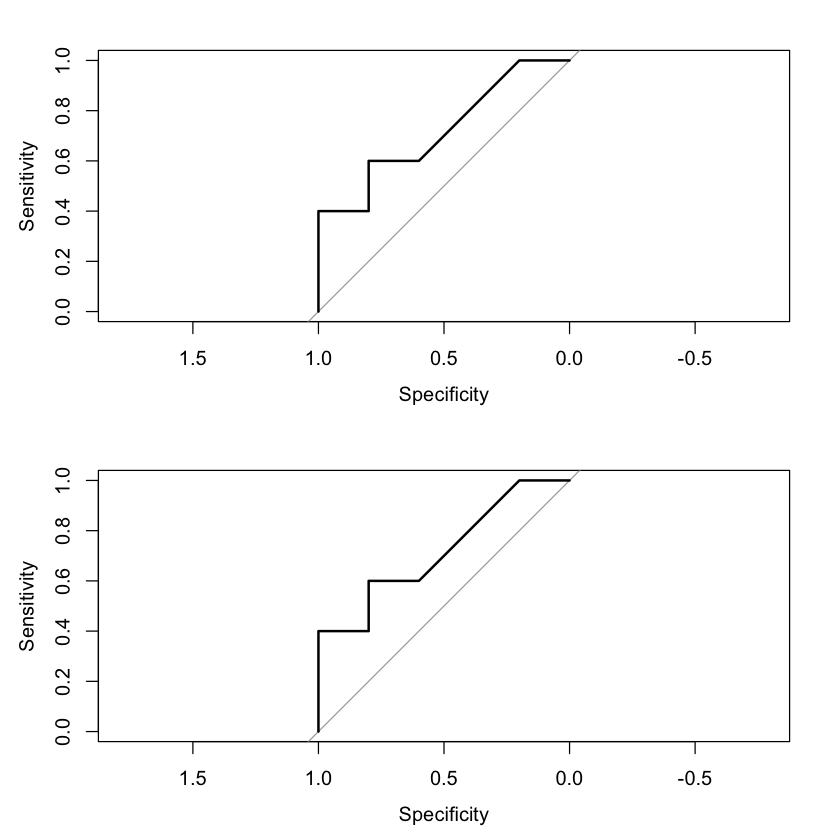

In [37]:
# To illustrate the ROC curve, you can use the pROC package
library(pROC)

# ROC based on the scores
roc_direct = roc(df$y, df$score)
# ROC curve using platt's probabilities
roc_platt = roc(df$y, q)
# compare the curves
par(mfrow = c(2, 1))
plot(roc_direct)
plot(roc_platt)

As is evident, the ROC curve corresponding to scores doesn't differ at all from the ROC curve constructed from probabilities. They are the exact same curve, with the exact same AUC. 

(Not sure why the xlims are so weird... blame the pROC library, not me)